### HEALTHCARE DATA ANALYSIS

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### Reading the dataset

In [2]:
Data = pd.read_csv('Data.csv')

In [48]:
Data.to_csv("Healthcare.csv")

In [47]:
Data.head(2)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Schedule_weekday,Appointment_weekday,Age_group
0,5642903,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,61 - 81
1,5642503,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,41 - 61


In [4]:
Data.shape

(110527, 14)

In [5]:
Data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
Data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### modifying the date and time into standard form

In [8]:
Data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [9]:
Data['ScheduledDay'] = pd.to_datetime(Data['ScheduledDay']).dt.date.astype('datetime64[ns]')
Data['AppointmentDay'] = pd.to_datetime(Data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

#### for the schedule day and appointment day storing the weekdays only into a variable

In [11]:
#The day of the week with Monday=0, Sunday=6.

Data['Schedule_weekday'] = Data['ScheduledDay'].dt.dayofweek
Data['Appointment_weekday'] = Data['AppointmentDay'].dt.dayofweek

In [12]:
Data['Schedule_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: Schedule_weekday, dtype: int64

In [13]:
Data['Appointment_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: Appointment_weekday, dtype: int64

In [14]:
Data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Schedule_weekday', 'Appointment_weekday'],
      dtype='object')

In [15]:
Data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Schedule_weekday,Appointment_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4


In [16]:
#Rename some wrong columns columns

Data = Data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'NoShow', 'SMS_received': 'SMSreceived'})

In [17]:
Data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'NoShow',
       'Schedule_weekday', 'Appointment_weekday'],
      dtype='object')

In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PatientId            110527 non-null  float64       
 1   AppointmentID        110527 non-null  int64         
 2   Gender               110527 non-null  object        
 3   ScheduledDay         110527 non-null  datetime64[ns]
 4   AppointmentDay       110527 non-null  datetime64[ns]
 5   Age                  110527 non-null  int64         
 6   Neighbourhood        110527 non-null  object        
 7   Scholarship          110527 non-null  int64         
 8   Hypertension         110527 non-null  int64         
 9   Diabetes             110527 non-null  int64         
 10  Alcoholism           110527 non-null  int64         
 11  Handicap             110527 non-null  int64         
 12  SMSreceived          110527 non-null  int64         
 13  NoShow        

In [19]:
#Droping some columns
Data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Schedule_weekday,Appointment_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4


In [20]:
Data.drop(['PatientId', 'Neighbourhood'], axis =1, inplace = True)

In [21]:
Data.head(2)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Schedule_weekday,Appointment_weekday
0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4


In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AppointmentID        110527 non-null  int64         
 1   Gender               110527 non-null  object        
 2   ScheduledDay         110527 non-null  datetime64[ns]
 3   AppointmentDay       110527 non-null  datetime64[ns]
 4   Age                  110527 non-null  int64         
 5   Scholarship          110527 non-null  int64         
 6   Hypertension         110527 non-null  int64         
 7   Diabetes             110527 non-null  int64         
 8   Alcoholism           110527 non-null  int64         
 9   Handicap             110527 non-null  int64         
 10  SMSreceived          110527 non-null  int64         
 11  NoShow               110527 non-null  object        
 12  Schedule_weekday     110527 non-null  int64         
 13  Appointment_we

In [23]:
Data.describe()

,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Schedule_weekday,Appointment_weekday
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


#### Bar Graph Plotting

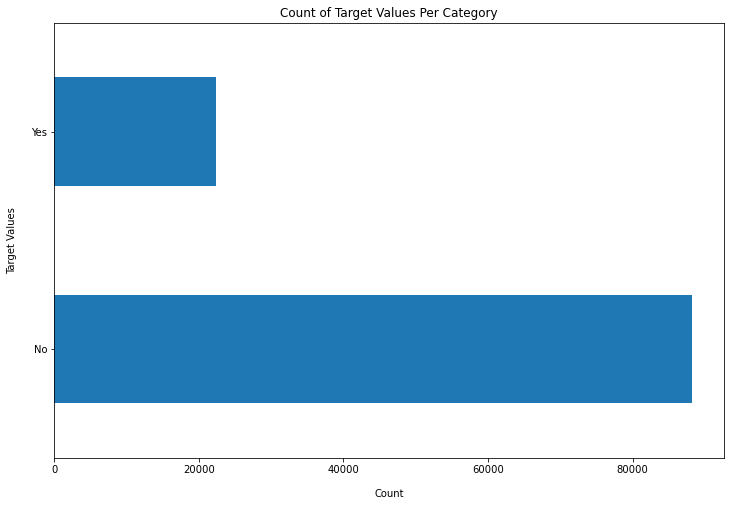

In [24]:
Data['NoShow'].value_counts().plot(kind ='barh', figsize=(12,8))
plt.xlabel("Count", labelpad = 14)
plt.ylabel("Target Values", labelpad = 14)
plt.title("Count of Target Values Per Category", size = 12);

In [25]:
Data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [26]:
100*Data['NoShow'].value_counts()/len(Data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [27]:
#check missing values
Data.isnull().sum()

AppointmentID          0
Gender                 0
ScheduledDay           0
AppointmentDay         0
Age                    0
Scholarship            0
Hypertension           0
Diabetes               0
Alcoholism             0
Handicap               0
SMSreceived            0
NoShow                 0
Schedule_weekday       0
Appointment_weekday    0
dtype: int64

### Mising Data- Initial Intution

- Here we Don't have any missing data

#### Genral Thumb Rule:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. 

### Data Cleaning

- Create a copy of original data

In [28]:
New_Data = Data.copy()

In [29]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AppointmentID        110527 non-null  int64         
 1   Gender               110527 non-null  object        
 2   ScheduledDay         110527 non-null  datetime64[ns]
 3   AppointmentDay       110527 non-null  datetime64[ns]
 4   Age                  110527 non-null  int64         
 5   Scholarship          110527 non-null  int64         
 6   Hypertension         110527 non-null  int64         
 7   Diabetes             110527 non-null  int64         
 8   Alcoholism           110527 non-null  int64         
 9   Handicap             110527 non-null  int64         
 10  SMSreceived          110527 non-null  int64         
 11  NoShow               110527 non-null  object        
 12  Schedule_weekday     110527 non-null  int64         
 13  Appointment_we

##### As we don't any null records, there is no data cleaning required

In [30]:
Data.head(2)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Schedule_weekday,Appointment_weekday
0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4


In [31]:
Data['Age'].max()

115

- Group the tenure in bins of 12 months

In [32]:
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

Data['Age_group'] = pd.cut(Data.Age, range(1, 130, 20), right=False, labels=labels)

In [33]:
Data.drop(['Age'], axis = 1, inplace = True)

### Data Exploration

In [34]:
list(Data.columns)

['AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSreceived',
 'NoShow',
 'Schedule_weekday',
 'Appointment_weekday',
 'Age_group']

- having a loook into the values of count of each columns and there count in respect to NoShow column

In [35]:
#coverting target variable into 0 and 1

Data.NoShow.value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [36]:
Data['NoShow'] = np.where(Data.NoShow == 'Yes',1,0)

In [37]:
Data.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

 Covert all categorical variable in to dummy Variable

In [38]:
Data_dummies = pd.get_dummies(Data)
Data_dummies.head()

,AppointmentID,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,Schedule_weekday,Appointment_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,5642903,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,5642503,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,5642549,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,5642828,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,5642494,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


Build a corelation of all predictors with 'NoShow'

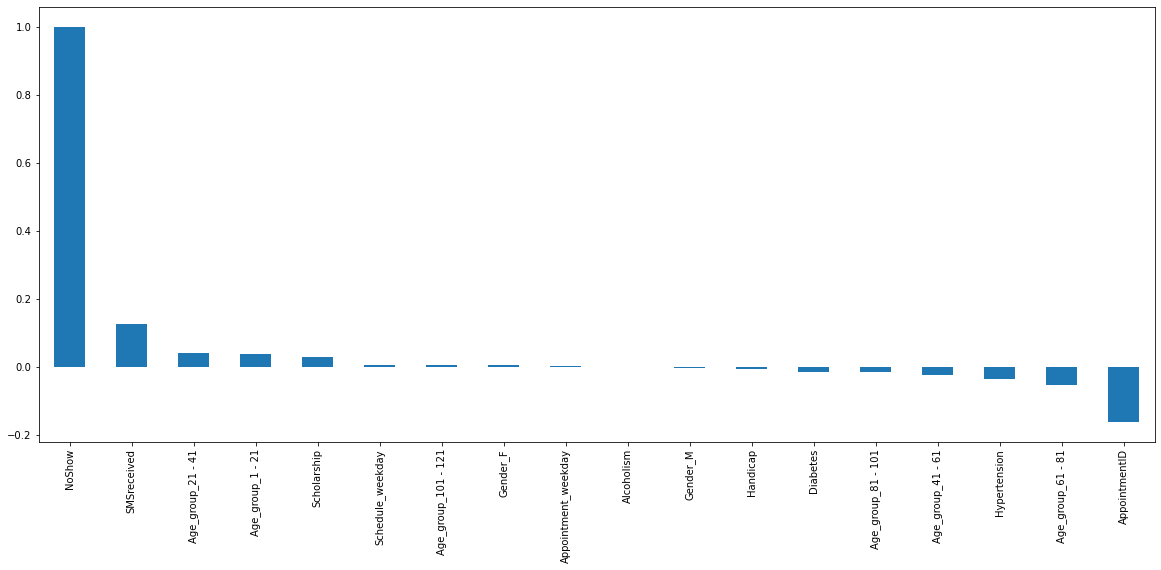

In [39]:
plt.figure(figsize=(20,8))
Data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar');

<AxesSubplot:>

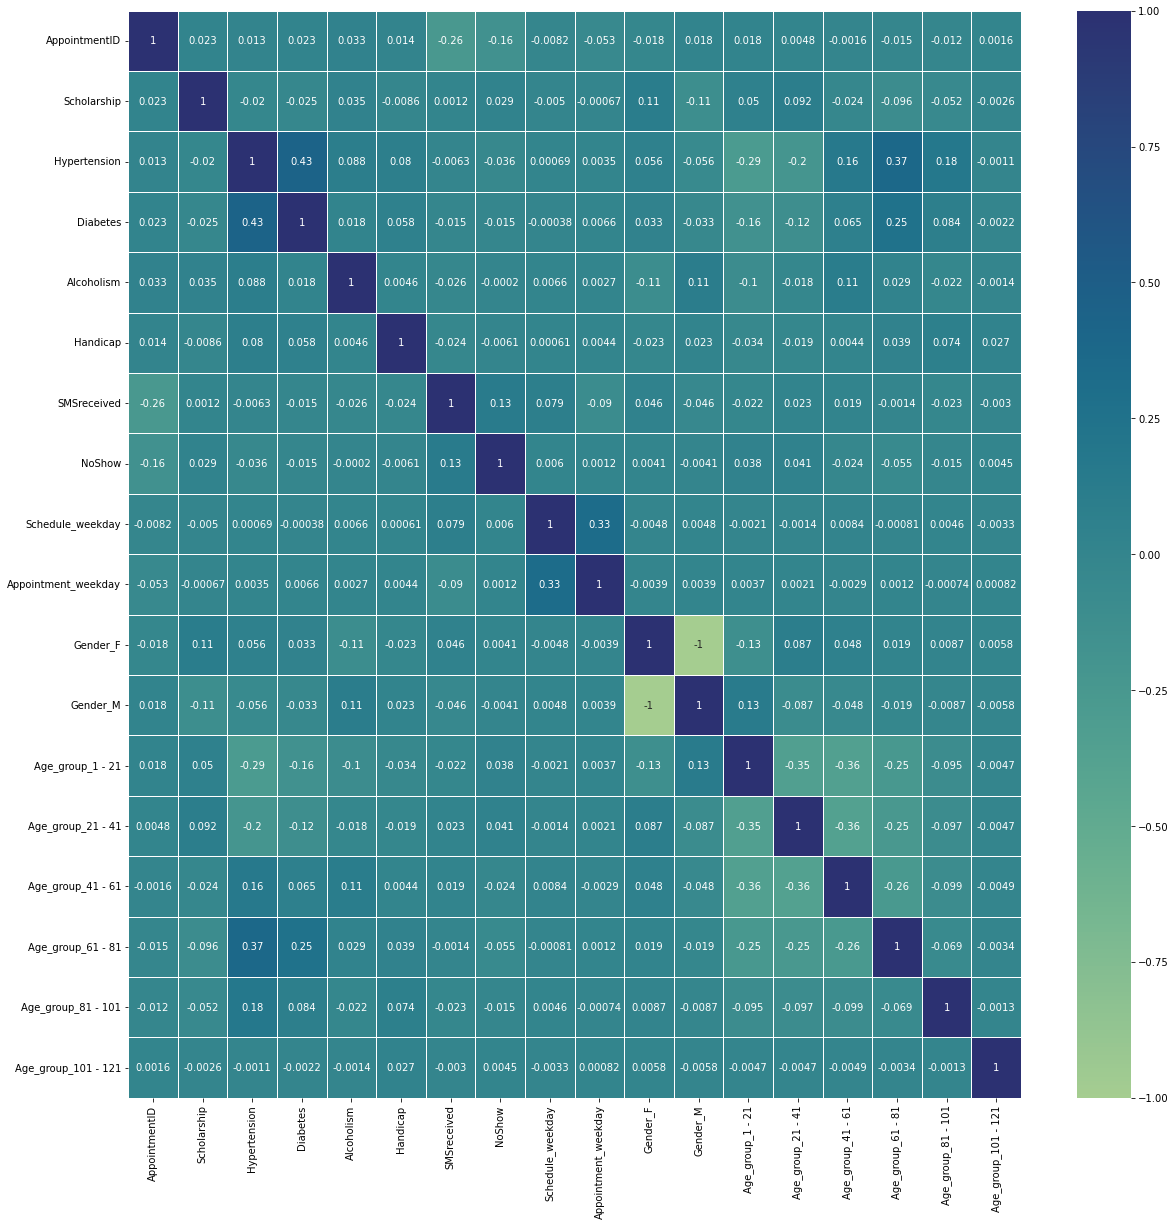

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(Data_dummies.corr(), cmap = 'crest', annot =True, linewidth = .5)

In [41]:
new_data_target0 = Data.loc[Data['NoShow']==0]
new_data_target1 = Data.loc[Data['NoShow']==0]

In [42]:
def uniplot(data, columns, title, hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(data[columns].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = data, x= columns, order=data[columns].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

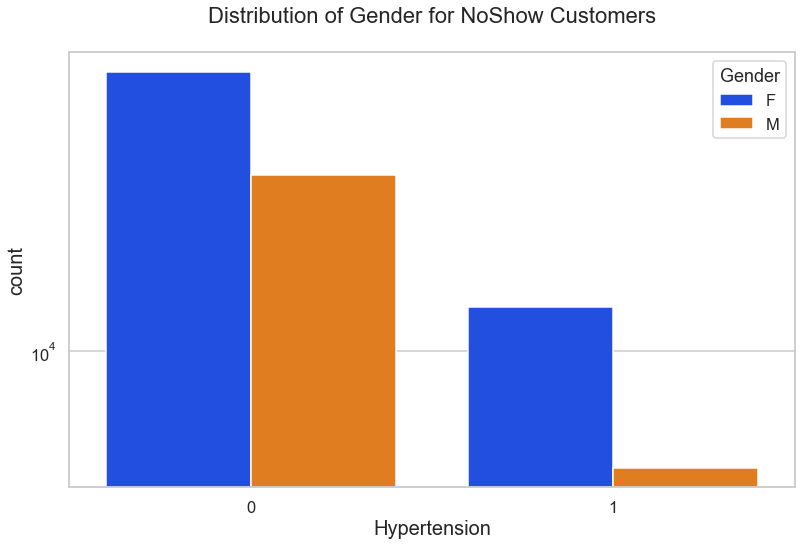

In [43]:
uniplot(new_data_target1,columns='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender');

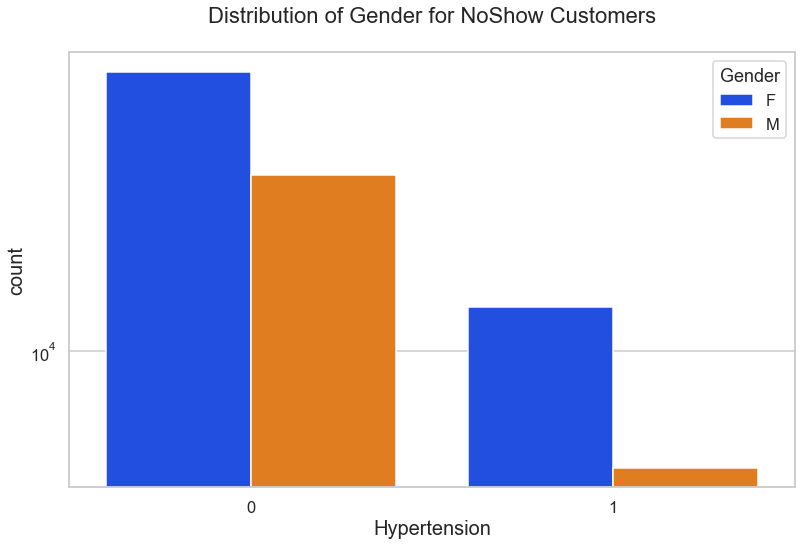

In [44]:
uniplot(new_data_target0,columns='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender');

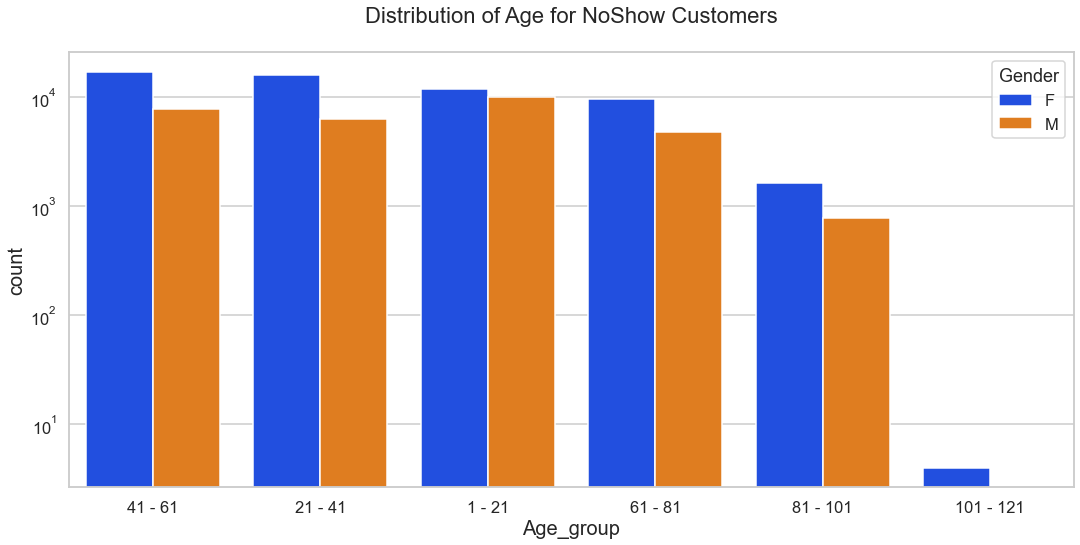

In [45]:
uniplot(new_data_target0,columns='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender');

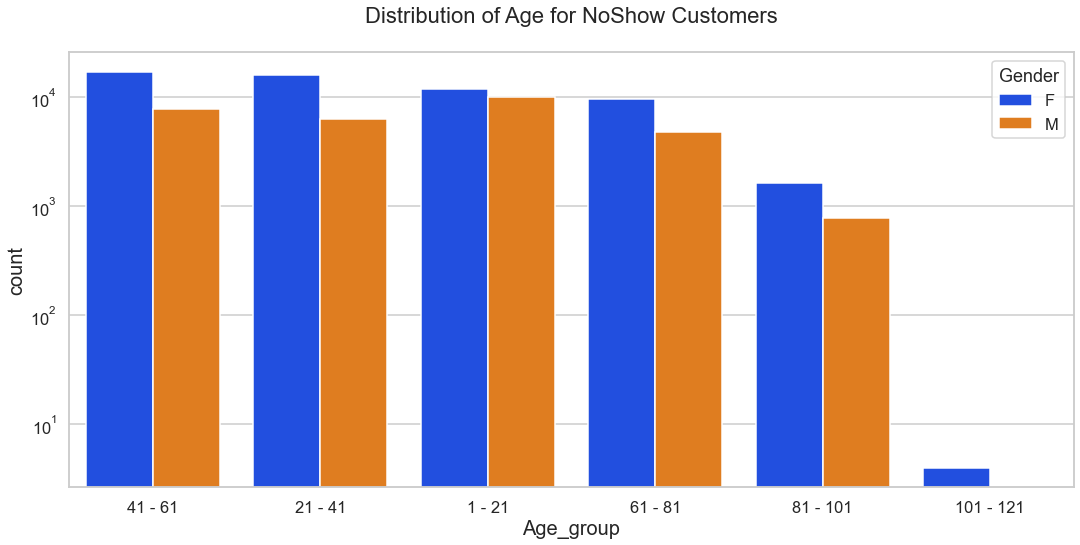

In [46]:
uniplot(new_data_target0,columns='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender');

### Conclusion

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit. 
8. there is no appointments on sunday and on saturday appointments are very less in comparision to other week days 

